# Overview



## The Multivariate Gaussian Distribution

* ${\color{YellowGreen}X} = [x_1 \dots x_m]^T : \mathit{m}$ jointly Gaussian random variables: ${\color{YellowGreen}X} \sim \mathcal{N} ( m_X , C_{XX} )$

with mean

$
\begin{split}
m_X & = E{\color{YellowGreen}X} 
\\
& = \int \mathrm{d}x_1 \dots \int \mathrm{d}x_m f_{\color{YellowGreen}X}(X)X
\\
& =
\begin{bmatrix}
\int \mathrm{d}x_1 \dots \int \mathrm{d}x_m f_{\color{YellowGreen}X}(X)x_1 \\
\dots \\
\int \mathrm{d}x_1 \dots \int \mathrm{d}x_m f_{\color{YellowGreen}X}(X)x_m
\end{bmatrix}
\\
& =
\begin{bmatrix}
\int \mathrm{d}x_1 x_1 \frac{f_{x_1}(x_1)}{\widehat{\int \mathrm{d}x_2 \dots \int \mathrm{d}x_m f_{\color{YellowGreen}X}(X)X}} \\
\dots \\
\int \mathrm{d}x_m x_m \frac{\int \mathrm{d}x_1 \dots \int \mathrm{d}x_{m - 1 } f_{\color{YellowGreen}X}(X)X}{\widetilde{f_{x_m}(x_m)}}
\end{bmatrix}
\\
& =
\begin{bmatrix}
m_{x1} \\
\dots \\
m_{xm}
\end{bmatrix} \qquad \qquad \qquad \qquad  \qquad 
\end{split}
$

and covariance matrix _(matrix of correlation)_

$
\begin{split}
C_{XX} & = E({\color{YellowGreen}X} - m_x)({\color{YellowGreen}X} - m_x)^T
\\
& = \int \mathrm{d}x_1 \dots \int \mathrm{d}x_m \frac{f_X(X)}{density \geq 0} \frac{({\color{YellowGreen}X} - m_x)({\color{YellowGreen}X} - m_x)^T}{\geq 0, rank \; 1}
\\
\text { where } C_{x_ix_j} & = E({\color{YellowGreen}x}_i - m_{x_i})({\color{YellowGreen}x}_j - m_{x_j})
\\
\end{split}
$

As weighted average of positive semi-definite matrices: $C_{XX} = C_{XX} \geq 0$ symmetric and positive semi-definite:

$\forall U \in \mathcal{R}^m : U^T C_{XX} U = U^T E({\color{YellowGreen}X} − m_X )( {\color{YellowGreen}X} − m_X )^T U = E( U^T({\color{YellowGreen}X} − m_X ))^2 \geq 0$

$\qquad \qquad \qquad $<img src=images/covariance_matrix.png width='25%' height='25%' ></img>

- joint Gaussian probability density function (pdf):

$
\begin{split}
f_{\color{YellowGreen}X}(X) & = (2\pi)^{- \frac{m}{2}} (det \; C_{XX} )^{- \frac{1}{2}} exp \big( - \frac{1}{2} [ {\color{YellowGreen}X} - m_X ]^T \; C_{XX}^{-1} \; [ {\color{YellowGreen}X} - m_X ] \big)
\\
f_{\color{YellowGreen}X}(X; m_X, C_{XX}) & = \frac{1}{\sqrt{(2\pi)^m \text{det}(C_{XX})}} \exp\left(-\frac{1}{2}[{\color{YellowGreen}X} - m_X]^T C_{XX}^{-1} [{\color{YellowGreen}X} - m_X]\right)
\\
\end{split}
$
_Result is a scalar expression_

In [2]:
using Plots

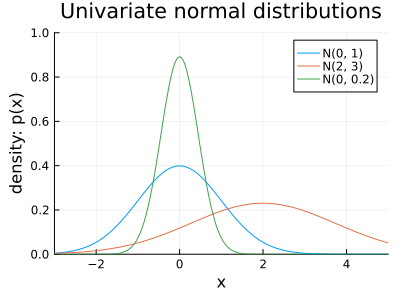

In [17]:
function univariate_normal(x, mean, variance)
    x_array = collect(x)
    return (1. / sqrt(2 * π * variance)) * exp.(-(x_array .- mean).^2 / (2 * variance))
end

# Plot different Univariate Normals in a single plot
x = range(-3, stop=5, length=150)

plot(x, univariate_normal(x, 0, 1), label="N(0, 1)")
plot!(x, univariate_normal(x, 2, 3), label="N(2, 3)")
plot!(x, univariate_normal(x, 0, 0.2), label="N(0, 0.2)",
      xlabel="x", ylabel="density: p(x)", title="Univariate normal distributions",
      ylim=(0, 1), xlim=(-3, 5), legend=:topright, size=(400, 300))


## The Multivariate Gaussian Distribution (2)

* ${\color{YellowGreen}X} = [x_1 \dots x_m]^T$ and ${\color{Salmon}Y} = [y_1 \dots y_n]^T : \mathit{m + n}$ jointly Gaussian random variables:

$$
\begin{gather}
\begin{bmatrix}
{\color{YellowGreen}X} \\
{\color{Salmon}Y}
\end{bmatrix} \;
\sim
\mathcal{N}
\Bigg(
\begin{bmatrix}
m_X \\
m_Y
\end{bmatrix} \;
,
\begin{bmatrix}
C_{XX} & C_{XY} \\
C_{YX} & C_{YY} 
\end{bmatrix}
\Bigg)
\quad C_{??} \text{ are 2x2 block matrices }
\end{gather}
$$

with mean and covariance matrix

$$
\begin{gather}
\begin{bmatrix}
m_X \\
m_Y
\end{bmatrix}
=
E
\begin{bmatrix}
{\color{YellowGreen}X} \\
{\color{Salmon}Y}
\end{bmatrix}
, C =
\begin{bmatrix}
C_{XX} & C_{YX} \\
C_{YX} & C_{YY}
\end{bmatrix}
\to 
\begin{array}{c|c}
  m \; X \; m & m \; X \; n \\ 
  \hline
  n \; X \; m & n \; X \; n
 \end{array}
 = E
 \begin{bmatrix}
 {\color{YellowGreen}X} - m_X \\
 {\color{Salmon}Y} - m_Y
 \end{bmatrix}
 \begin{bmatrix}
 {\color{YellowGreen}X} - m_X \\
 {\color{Salmon}Y} - m_Y
 \end{bmatrix}^T
\end{gather}
$$

* joint Gaussian probability density function (pdf):

#####################

$
\begin{split}
f_{\color{YellowGreen}X}(X) & = (2\pi)^{- \frac{m}{2}} (det \; C_{XX} )^{- \frac{1}{2}} exp \big( - \frac{1}{2} [ {\color{YellowGreen}X} - m_X ]^T \; C_{XX}^{-1} \; [ {\color{YellowGreen}X} - m_X ] \big)
\\
f_{\color{YellowGreen}X}(X; m_X, C_{XX}) & = \frac{1}{\sqrt{(2\pi)^m \text{det}(C_{XX})}} \exp\left(-\frac{1}{2}[{\color{YellowGreen}X} - m_X]^T C_{XX}^{-1} [{\color{YellowGreen}X} - m_X]\right)
\\
\end{split}
$
_Result is a scalar expression_

# References

- [ ] [Multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)
- [ ] [Univariate/Multivariate Gaussian Distribution and their properties](https://mmuratarat.github.io/2019-10-05/univariate-multivariate_gaussian)